[[[192 193 188 255]
  [193 194 189 255]
  [193 193 189 255]
  ...
  [151 169 173 255]
  [152 170 174 255]
  [153 170 174 255]]

 [[190 191 185 255]
  [189 190 185 255]
  [188 189 184 255]
  ...
  [153 171 175 255]
  [153 171 175 255]
  [153 170 174 255]]

 [[185 186 183 255]
  [185 186 181 255]
  [186 187 182 255]
  ...
  [153 171 176 255]
  [153 171 176 255]
  [153 171 175 255]]

 ...

 [[140 154 166 255]
  [148 162 173 255]
  [146 160 171 255]
  ...
  [169 174 178 255]
  [169 174 178 255]
  [170 175 179 255]]

 [[146 160 172 255]
  [153 167 178 255]
  [148 162 173 255]
  ...
  [170 175 179 255]
  [169 174 178 255]
  [167 172 176 255]]

 [[145 160 173 255]
  [149 162 174 255]
  [147 160 172 255]
  ...
  [170 174 178 255]
  [168 173 177 255]
  [165 171 175 255]]]
<class 'PIL.PngImagePlugin.PngImageFile'>
[[[192 193 188]
  [193 194 189]
  [193 193 189]
  ...
  [151 169 173]
  [152 170 174]
  [153 170 174]]

 [[190 191 185]
  [189 190 185]
  [188 189 184]
  ...
  [153 171 175]
  [153 171

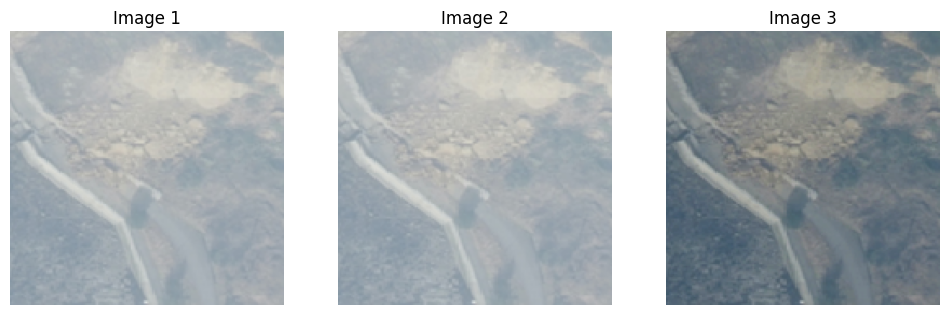

In [11]:
from pathlib import Path
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import cv2
import numpy as np

def imgplot(img1, img2, img3):
    # サブプロットを作成
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))
    
    # 1つ目の画像を表示
    axs[0].imshow(img1)
    axs[0].axis('off')  # 軸を非表示にする場合
    axs[0].set_title('Image 1')
    
    # 2つ目の画像を表示
    axs[1].imshow(img2)
    axs[1].axis('off')  # 軸を非表示にする場合
    axs[1].set_title('Image 2')

    # 2つ目の画像を表示
    axs[2].imshow(img3)
    axs[2].axis('off')  # 軸を非表示にする場合
    axs[2].set_title('Image 3')

    plt.show()

imgpath=r"C:\Users\kyohe\ishikawa_QGISimageclipPolygon\0102\areaN\ClippedPNG"
inputname=r"\n16.png"

# 画像の読み込み
img = Image.open(str(Path(imgpath+inputname)))
img_cv = cv2.cvtColor(cv2.imread(str(Path(imgpath+inputname))), cv2.COLOR_BGR2RGB)

print(np.array(img))
print(type(img))
print(img_cv)
print(type(img))


# 明るさの調整
brightness_enhancer = ImageEnhance.Brightness(img)
img_brightened = brightness_enhancer.enhance(0.7)  # 1.5は明るさの強さを示す。1.0が元の画像

# コントラストの調整
contrast_enhancer = ImageEnhance.Contrast(img_brightened)
img_contrasted = contrast_enhancer.enhance(2)  # 2.0はコントラストの強さを示す。1.0が元の画像

# 画像の表示
imgplot(img, img_cv, img_contrasted)

# 必要に応じて保存


In [1]:
from pathlib import Path
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np

trainpath=r"C:\Users\kyohe\Aerial-Photo-Classifier\20241023Data\Train_SameSize"
savepath=r"C:\Users\kyohe\Aerial-Photo-Classifier\20241023Data\Train_SameSize_BrightContrast"


brightnesses=[0.7, 1.0, 1.3]
contrasts=[0.7, 1.0, 1.5]

imgpaths=list(sorted(Path(trainpath).glob("*\*")))


for imgpath in imgpaths:
    img = Image.open(str(imgpath))
    imgname=str(imgpath).split("\\")[-1].split(".")[-2]
    label = str(imgpath).split("\\")[-2]

    for i, brightness in enumerate(brightnesses):
        # 明るさの調整
        brightness_enhancer = ImageEnhance.Brightness(img)
        img_brightened = brightness_enhancer.enhance(brightness)  # 1.5は明るさの強さを示す。1.0が元の画像

        for j, contrast in enumerate(contrasts):
            # コントラストの調整
            contrast_enhancer = ImageEnhance.Contrast(img_brightened)
            img_contrasted = contrast_enhancer.enhance(contrast)  # 2.0はコントラストの強さを示す。1.0が元の画像

            savepath2=str(Path(savepath+"\\"+label+"\\"+imgname+"_B"+str(i)+"C"+str(j)+".png"))
            img_contrasted.save(savepath2)

print("saved all aug images!")

saved all aug images!
